In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten

ImportError: cannot import name 'layers' from 'keras.models' (d:\practice\surface_defect_detection\venv\lib\site-packages\keras\models\__init__.py)

In [20]:
train_data = image_dataset_from_directory(
    directory="../data/raw/train/images",
    label_mode = 'categorical',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32
)

test_data = image_dataset_from_directory(
    directory="../data/raw/validation/images",
    label_mode = 'categorical',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32
)

Found 1440 files belonging to 6 classes.
Found 360 files belonging to 6 classes.


In [21]:
# NORMALIZING THE IMAGES

def normalize(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_input = train_data.map(normalize)
test_input = test_data.map(normalize)


In [37]:
# Data Augmentation
augment_step = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1)
])

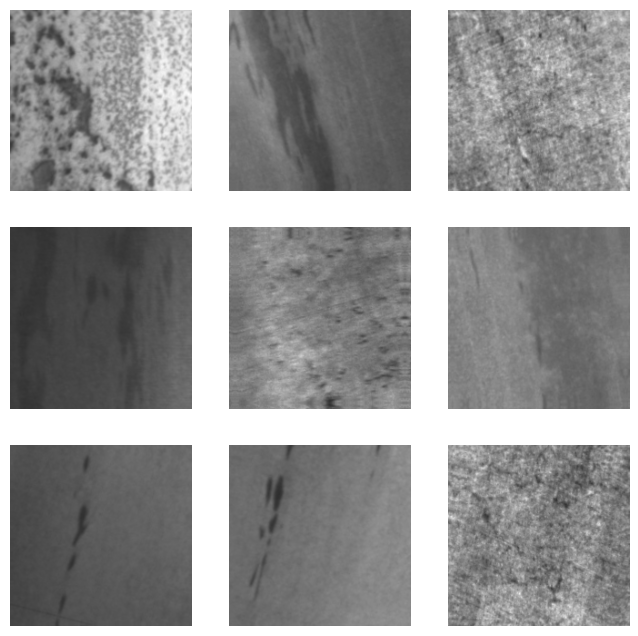

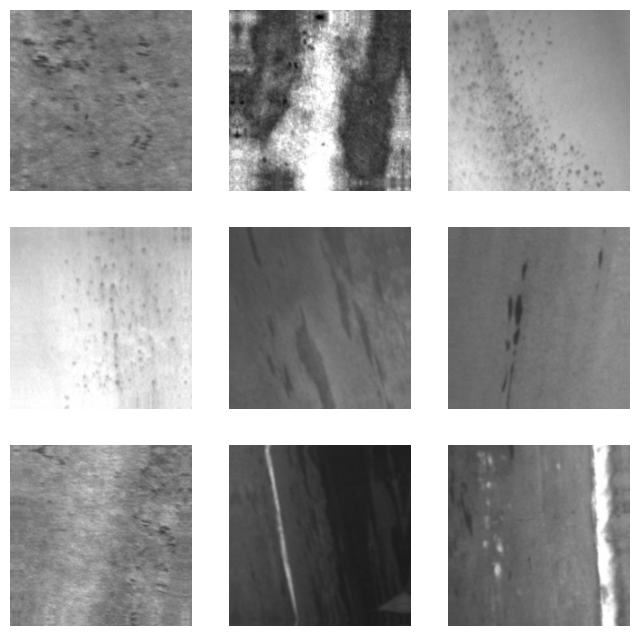

In [9]:
import matplotlib.pyplot as plt

for images, labels in train_input.take(2):
    augmented_images = augment_step(images)

    plt.figure(figsize=(8, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i])
        plt.axis("off")
    plt.show()

In [ ]:
model = Sequential()

model.add(keras.layers.Input(shape=(200,200,3)))

model.add(augment_step)

model.add(Conv2D(32,kernel_size=(3,3), strides=1, padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64,kernel_size=(3,3), strides=1, padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128,kernel_size=(3,3), strides=1, padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Dense(6, activation='softmax'))


In [39]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │    18,874,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,902,918 (72.11 MB)

 Trainable params: 18,902,726 (72.11 MB)

 Non-trainable params: 192 (768.00 B)

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(train_input, epochs = 20, validation_data=test_input)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5688 - loss: 21.5857 - val_accuracy: 0.2889 - val_loss: 14.3660
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6562 - loss: 12.9520 - val_accuracy: 0.2694 - val_loss: 13.2233
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6958 - loss: 11.1221 - val_accuracy: 0.2167 - val_loss: 18.4894
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7278 - loss: 8.8951 - val_accuracy: 0.3111 - val_loss: 34.2992
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7500 - loss: 6.5893 - val_accuracy: 0.1750 - val_loss: 42.4448
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7597 - loss: 5.5006 - val_accuracy: 0.1250 - val_loss: 23.6286
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7931 - loss: 3.8628 - val_accuracy: 0.1500 - val_loss: 20.6091
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7799 - loss: 3.6585 - val_accuracy: 0.2222 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot()